In [1]:
import numpy as np
import torch


import json
from torch.utils.data import DataLoader
from torch.optim import SGD 
from torch import nn

In [2]:
import utils_generic as generic
import singletask_simple as st
import model_confs as confs


import train

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
torch.manual_seed(27)

In [4]:
model_conf = confs.roberta_conf

# Datos ConvAI2

In [5]:
with open('Datasets\ConvAI2\convai2_complete.json','r') as f:
    data = json.load(f)

In [6]:
convai_train = data['train']
convai_val = data['validation']



convai_train_token = generic.tokenize_dataset(convai_train,['about','to','as'],model_conf) 
convai_val_token = generic.tokenize_dataset(convai_val,['about','to','as'],model_conf) 

In [7]:
convai_train_dataset = {}
for task in ['to','as','about']:
    convai_train_dataset[task] = st.DatasetSingleTaskSimple(convai_train_token,task,eval=False)

In [8]:
convai_val_dataset = {}
for task in ['to','as','about']:
    convai_val_dataset[task] = st.DatasetSingleTaskSimple(convai_val_token,task,eval=False)

## Datos md_gender

In [9]:
with open('Datasets\md_gender\md_complete.json','r',encoding="utf8") as f:
    md_data = json.load(f)

In [10]:
md_tokenized = generic.tokenize_dataset(md_data,['about','to','as'],model_conf) 


md_dataset = {}
for task in ['to','as','about']:
    md_dataset[task] = st.DatasetSingleTaskSimple(md_tokenized,task,eval=True)

# Creación dataloaders

In [11]:
dl_train = {}
for task in ['to','as','about']:
    dl_train[task] = DataLoader(convai_train_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [12]:
dl_val = {}
for task in ['to','as','about']:
    dl_val[task] = DataLoader(convai_val_dataset[task],batch_size=128,shuffle=True,collate_fn=st.collate_fn)

In [13]:
dl_eval = {}
for task in ['to','as','about']:
    dl_eval[task] = DataLoader(md_dataset[task],batch_size=128,shuffle=False,collate_fn=st.collate_fn)

# ABOUT

In [14]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_roberta_ABOUT'

c:\Users\FarinhOso\anaconda3\envs\tfg\lib\site-packages\huggingface_hub-0.12.0rc0-py3.8.egg\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\FarinhOso\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_h

In [15]:
for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.5102040816326531 

Using scikit learn accuracy por género en el conjunto about
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.4810606060606061 

Using scikit learn accuracy por género en el conjunto to
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.48370273794002605 

Using scikit learn accuracy por género en el conjunto as
MALE 0.0
FEMALE 1.0 



  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.686033239659532 	 Validation loss: 0.6841395830703993 	 
  1%|          | 574/57400 [01:16<1:58:11,  8.01it/s]
Epoch 2 	 Training loss: 0.6831125530839381 	 Validation loss: 0.6832521557807922 	 
  2%|▏         | 1148/57400 [02:33<2:11:02,  7.15it/s]
Epoch 3 	 Training loss: 0.6818744254652216 	 Validation loss: 0.6826529856455528 	 
  3%|▎         | 1722/57400 [03:50<1:43:25,  8.97it/s]
Epoch 4 	 Training loss: 0.680161997831657 	 Validation loss: 0.6804182812318964 	 
  4%|▍         | 2296/57400 [05:08<2:06:43,  7.25it/s]
Epoch 5 	 Training loss: 0.6737790517898387 	 Validation loss: 0.6627272276555077 	 
  5%|▌         | 2870/57400 [06:25<1:52:30,  8.08it/s]
Epoch 6 	 Training loss: 0.5563210750498423 	 Validation loss: 0.44513107204841357 	 
  6%|▌         | 3444/57400 [07:43<2:00:04,  7.49it/s]
Epoch 7 	 Training loss: 0.44202444159818444 	 Validation loss: 0.4192693773972786 	 
  7%|▋         | 4018/57400 [09:01<2:02:53,  7.24it/s]
Epoch 8 	 Training lo

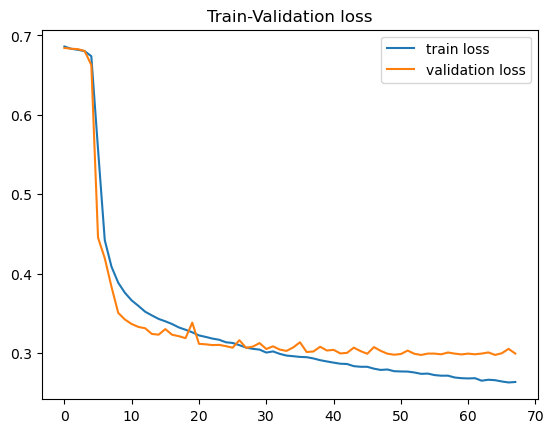

In [16]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['about'],optimizer,early_stop=10,dl_val=dl_val['about'],save_path=save_path)

In [17]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.8596938775510204 

Using scikit learn accuracy por género en el conjunto about
MALE 0.8619791666666666
FEMALE 0.8575 

GLOBAL: 0.6906565656565656 

Using scikit learn accuracy por género en el conjunto to
MALE 0.7031630170316302
FEMALE 0.6771653543307087 

GLOBAL: 0.6857887874837028 

Using scikit learn accuracy por género en el conjunto as
MALE 0.696969696969697
FEMALE 0.6738544474393531 



# TO

In [14]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_roberta_TO'

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6942872606503423 	 Validation loss: 0.6939236784385423 	 
  1%|          | 574/57400 [01:24<1:50:08,  8.60it/s]
Epoch 2 	 Training loss: 0.6931853415866347 	 Validation loss: 0.6922079203492504 	 
  2%|▏         | 1148/57400 [02:42<2:07:02,  7.38it/s]
Epoch 3 	 Training loss: 0.6932969296850809 	 Validation loss: 0.6928154684729495 	 
  3%|▎         | 1722/57400 [03:59<2:07:50,  7.26it/s]
Epoch 4 	 Training loss: 0.6932285185059603 	 Validation loss: 0.6932526624808877 	 

1 epoch without improvement
  4%|▍         | 2296/57400 [05:17<1:56:00,  7.92it/s]
Epoch 5 	 Training loss: 0.6933723391140795 	 Validation loss: 0.6928950962373766 	 
  5%|▌         | 2870/57400 [06:36<2:01:39,  7.47it/s]
Epoch 6 	 Training loss: 0.6933277049961821 	 Validation loss: 0.6919897895748333 	 
  6%|▌         | 3444/57400 [07:55<2:02:06,  7.36it/s]
Epoch 7 	 Training loss: 0.6932110672213059 	 Validation loss: 0.6932495781930826 	 

1 epoch without improvement
  7%|▋         | 4

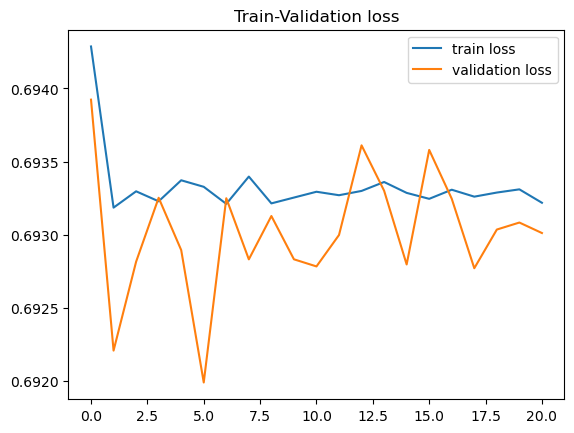

In [15]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['to'],optimizer,early_stop=10,dl_val=dl_val['to'],save_path=save_path)

In [16]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.5102040816326531 

Using scikit learn accuracy por género en el conjunto about
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.4810606060606061 

Using scikit learn accuracy por género en el conjunto to
MALE 0.0
FEMALE 1.0 

GLOBAL: 0.48370273794002605 

Using scikit learn accuracy por género en el conjunto as
MALE 0.0
FEMALE 1.0 



# AS

In [17]:
model = st.SingleTaskSimple(model_conf).to(device)
save_path='m1_roberta_AS'

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

GLOBAL: 0.4897959183673469 

Using scikit learn accuracy por género en el conjunto about
MALE 1.0
FEMALE 0.0 

GLOBAL: 0.5189393939393939 

Using scikit learn accuracy por género en el conjunto to
MALE 1.0
FEMALE 0.0 

GLOBAL: 0.516297262059974 

Using scikit learn accuracy por género en el conjunto as
MALE 1.0
FEMALE 0.0 



  0%|          | 0/57400 [00:00<?, ?it/s]

Epoch 1 	 Training loss: 0.6936021196925266 	 Validation loss: 0.6921203611260753 	 
  1%|          | 574/57400 [01:16<1:51:28,  8.50it/s]
Epoch 2 	 Training loss: 0.6932367827834153 	 Validation loss: 0.6929820543628628 	 
  2%|▏         | 1148/57400 [02:33<2:04:15,  7.54it/s]
Epoch 3 	 Training loss: 0.6932882354026888 	 Validation loss: 0.6929358930911048 	 
  3%|▎         | 1722/57400 [03:49<1:46:07,  8.74it/s]
Epoch 4 	 Training loss: 0.6932867852652945 	 Validation loss: 0.6930099867158017 	 
  4%|▍         | 2296/57400 [05:06<1:51:32,  8.23it/s]
Epoch 5 	 Training loss: 0.6933090044023268 	 Validation loss: 0.6935169858447576 	 

1 epoch without improvement
  5%|▌         | 2870/57400 [06:22<1:41:57,  8.91it/s]
Epoch 6 	 Training loss: 0.6932578461718476 	 Validation loss: 0.6934003961288323 	 

2 epoch without improvement
  6%|▌         | 3444/57400 [07:38<1:49:53,  8.18it/s]
Epoch 7 	 Training loss: 0.6932875058169149 	 Validation loss: 0.6927974213988094 	 
  7%|▋         | 4

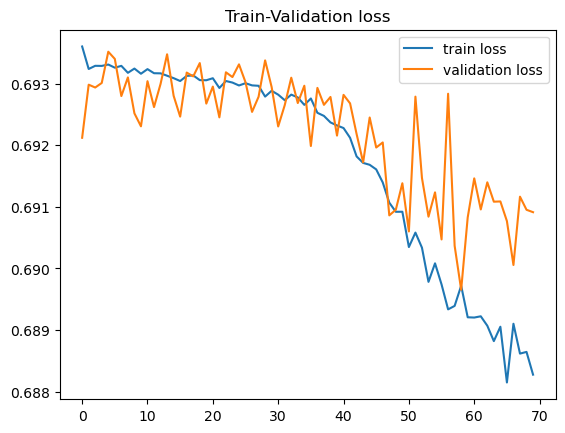

In [19]:
learning_rate = 5e-5
optimizer = SGD(model.parameters(), lr=learning_rate, momentum=0.9)
num_epochs = 100

train.train_function(model,num_epochs,dl_train['as'],optimizer,early_stop=10,dl_val=dl_val['as'],save_path=save_path)

In [20]:
model = st.SingleTaskSimple(model_conf).to(device)
model.load_state_dict(torch.load(save_path))

for task in ['about','to','as']:
    print(f"GLOBAL: {train.eval_function_single_sk(model,dl_eval[task])}",'\n')
    print(f"Using scikit learn accuracy por género en el conjunto {task}")
    print(f"MALE {train.eval_function_single_sk(model,dl_eval[task],gender='male')}")
    print(f"FEMALE {train.eval_function_single_sk(model,dl_eval[task],gender='female')}",'\n')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


GLOBAL: 0.6696428571428571 

Using scikit learn accuracy por género en el conjunto about
MALE 0.6354166666666666
FEMALE 0.7025 

GLOBAL: 0.6868686868686869 

Using scikit learn accuracy por género en el conjunto to
MALE 0.7177615571776156
FEMALE 0.6535433070866141 

GLOBAL: 0.6727509778357236 

Using scikit learn accuracy por género en el conjunto as
MALE 0.5959595959595959
FEMALE 0.7547169811320755 

